In [1]:
import pandas as pd
import os
from copy import copy

In [2]:
def plot_coord_data(df, y='l1', save_to=None, suptitle=None, x='width', hue='module',
                    legend='full', name_contains=None, name_not_contains=None,
                    loglog=True, logbase=2, face_color=None):
    ### preprocessing
    df = copy(df)

    # nn.Sequential has name '', which duplicates the output layer
    df = df[df.module != '']
    try:
        if name_contains is not None:
            df = df[df['module'].str.contains(name_contains)]
        elif name_not_contains is not None:
            df = df[~(df['module'].str.contains(name_not_contains))]
        # for nn.Sequential, module names are numerical
        df['module'] = pd.to_numeric(df['module'])
    except Exception as e:
        pass

    ts = df.t.unique()

    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()

    def tight_layout(plt):
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    ### plot
    fig = plt.figure(figsize=(5*len(ts), 4))
    if face_color is not None:
        fig.patch.set_facecolor(face_color)
    for t in ts:
        plt.subplot(1, len(ts), t)
        sns.lineplot(x=x, y=y, data=df[df.t==t], hue=hue, palette="flare", legend=legend if t==1 else None)
        plt.title(f't={t}')
        if t != 1:
            plt.ylabel('')
        if loglog:
            plt.loglog(base=logbase)
    if suptitle:
        plt.suptitle(suptitle)
    tight_layout(plt)

    return fig

In [3]:
df = pd.read_csv("../scripts/coord_checks/mup_adam_coord.csv")

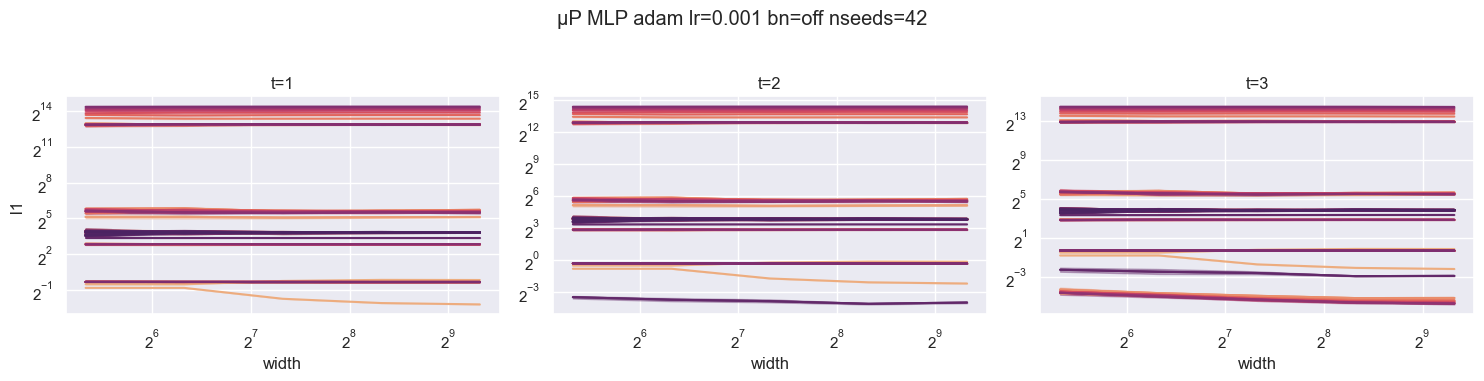

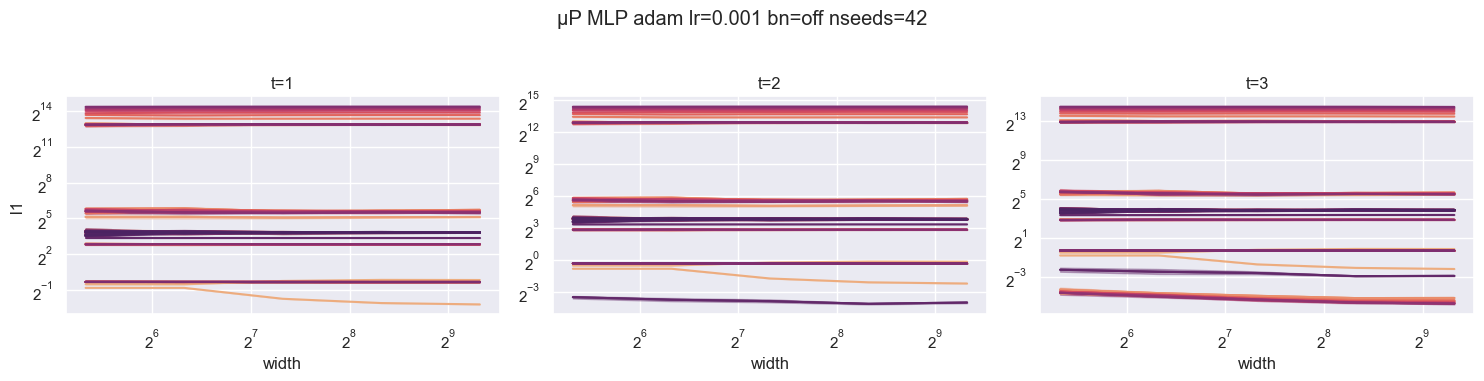

In [4]:
mup = True
batchnorm = False
prm = 'μP' if mup else 'SP'
bn = 'on' if batchnorm else 'off'
lr = 0.001
legend= False
name_contains = None
name_not_contains = None
plotdir = "output"
arch = "mlp"
optimizer = "adam"
nseeds = "42"

plot_coord_data(
    df,
    legend=legend,
    name_contains=name_contains,
    name_not_contains=name_not_contains,
    suptitle=f'{prm} {arch.upper()} {optimizer} lr={lr} bn={bn} nseeds={nseeds}',
)

In [5]:
df = pd.read_csv("../scripts/coord_checks/sp_adam_coord.csv")

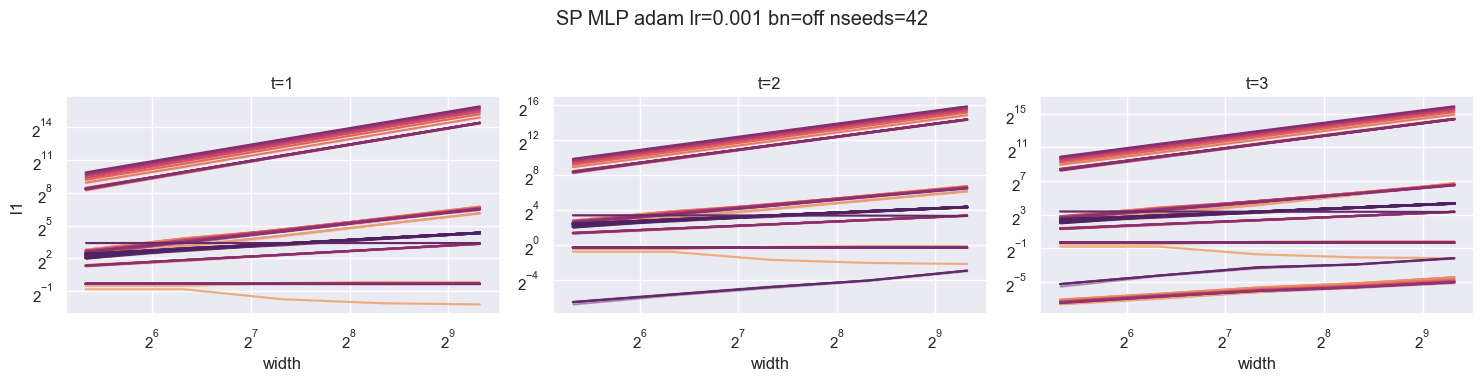

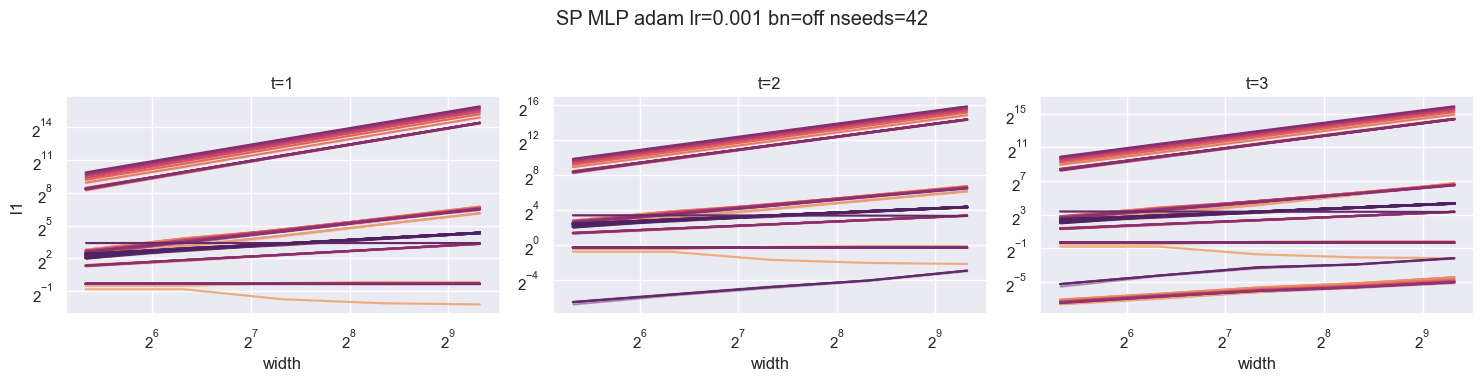

In [6]:
mup = False
batchnorm = False
prm = 'μP' if mup else 'SP'
bn = 'on' if batchnorm else 'off'
lr = 0.001
legend= False
name_contains = None
name_not_contains = None
plotdir = "output"
arch = "mlp"
optimizer = "adam"
nseeds = "42"

plot_coord_data(
    df,
    legend=legend,
    name_contains=name_contains,
    name_not_contains=name_not_contains,
    suptitle=f'{prm} {arch.upper()} {optimizer} lr={lr} bn={bn} nseeds={nseeds}',
)